# 1. Downloading the images
---


Our task is to generate images of dogs, so first we are going to need a lot of dog pictures.

We have chosen to use images from the Google Open Image Dataset V5.

This dataset contains 6 million images of a variety of different objects. Since this dataset is too large for us to download it all, and we only need images of dogs, we are going to filter it first, then download only what we need.

We recommend to skip the next few steps as getting the images this way takes way too long and we've already prepared a ZIP with all the necessary images.




In [0]:
!pip install awscli
# Download dataset metadata:
!wget https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv
!wget https://storage.googleapis.com/openimages/2018_04/test/test-annotations-bbox.csv 
!wget https://datasets.figure-eight.com/figure_eight_datasets/open-images/test-images.csv
# Parsing the dataset download links:
import pandas as pd
descriptions = pd.read_csv(r"class-descriptions-boxable.csv", sep=",", index_col=None, header=None)
dog_id = descriptions.loc[descriptions[1] == 'Dog'].iloc[0][0] # Get only the images that has a dog on it.
annotations = pd.read_csv(r"test-annotations-bbox.csv", sep=",", index_col=None)
dog_pictures = annotations.loc[annotations['LabelName'] == dog_id]
image_links = pd.read_csv(r"test-images.csv", sep=",", index_col=None)

In [0]:
# Downloading the images: (This takes a looong time..)
!rmdir -rf images
!mkdir images
import requests
import sys
lastpicture = ""
for id, picture in enumerate(dog_pictures["ImageID"]):
    if picture != lastpicture: 
        filename = "images/" + str(id+1) + ".jpg"
        url = image_links.loc[image_links['image_name'] == picture+".jpg"].iloc[0][1]    
        with open(filename, 'wb') as f:
            f.write(requests.get(url).content)
    lastpicture = picture

The downloaded images are of different sizes, so we need to resize them first. We will be using 64x64 images


In [0]:
# Resizing the downloaded images
from PIL import Image
import os, sys
!rm -r resized
!mkdir resized
path = "/content/resized"
outpath = "/content/resized0/"
dirs = os.listdir( path )

def resize():
    i = 0
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            imResize = im.resize((64,64), Image.ANTIALIAS)
            imResize.save(outpath + str(i) + '.jpg', 'JPEG', quality=90)
            i+=1
resize()

The above process takes a long time, so we've prepared a ZIP file so we don't have to repeat the above steps.

This file contains 4835 64x64 different images of dogs

In [6]:
!rm -f resized64.zip
!wget https://www.dropbox.com/s/rgetz6d16m1wvap/resized64.zip #64x64
!rm -rf images
!unzip resized64.zip

--2019-10-14 22:40:12--  https://www.dropbox.com/s/rgetz6d16m1wvap/resized64.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/rgetz6d16m1wvap/resized64.zip [following]
--2019-10-14 22:40:12--  https://www.dropbox.com/s/raw/rgetz6d16m1wvap/resized64.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc38b3d31d9e53edb99429011757.dl.dropboxusercontent.com/cd/0/inline/AuOcTorhP-WOesVK4Pqb2BaujVGNT02wBylFnsOdVlI9Gi6bIoZPiNmGMn6NA-GWkjUBF6_IsrhtWLsc_qQSyPUidc0k9sp-rA2ajxhIwqFovMjpNz3D_jljQcMC4McpLWY/file# [following]
--2019-10-14 22:40:12--  https://uc38b3d31d9e53edb99429011757.dl.dropboxusercontent.com/cd/0/inline/AuOcTorhP-WOesVK4Pqb2BaujVGNT02wBylFnsOdVlI9Gi6bIoZPiNmGMn6NA-GWkjUBF6_IsrhtWLsc_qQSyPUidc0k9sp-rA2ajxhIwqFo

# 2. Training data visualization

---


Let us take a look at the images:

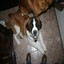

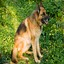

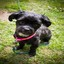

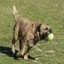

In [7]:
from IPython.display import Image
display(Image('images/1.jpg'))
display(Image('images/2.jpg'))
display(Image('images/123.jpg'))
display(Image('images/321.jpg'))

# 3. Preparing the data

---

Now we need to transform the image to a form we can feed into a neural network


In [0]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os
x_list = []
for filename in os.listdir("images/"):
  # Loading each image into an array
  img = np.asarray(image.load_img("images/"+filename))
  x_list.append(img)
x_train = np.asarray(x_list)

# Transforming data values from (0, 255) to (-1, 1):
x_train = x_train / 127.5 - 1

In [9]:
print(x_train.shape) # The training dataset contains 4835 images with the size of 64x64 each having 3 color channels.

(4835, 64, 64, 3)


In [0]:
# We now have a dataset that can be used to train a neural network.